20190183
20190593
20190645

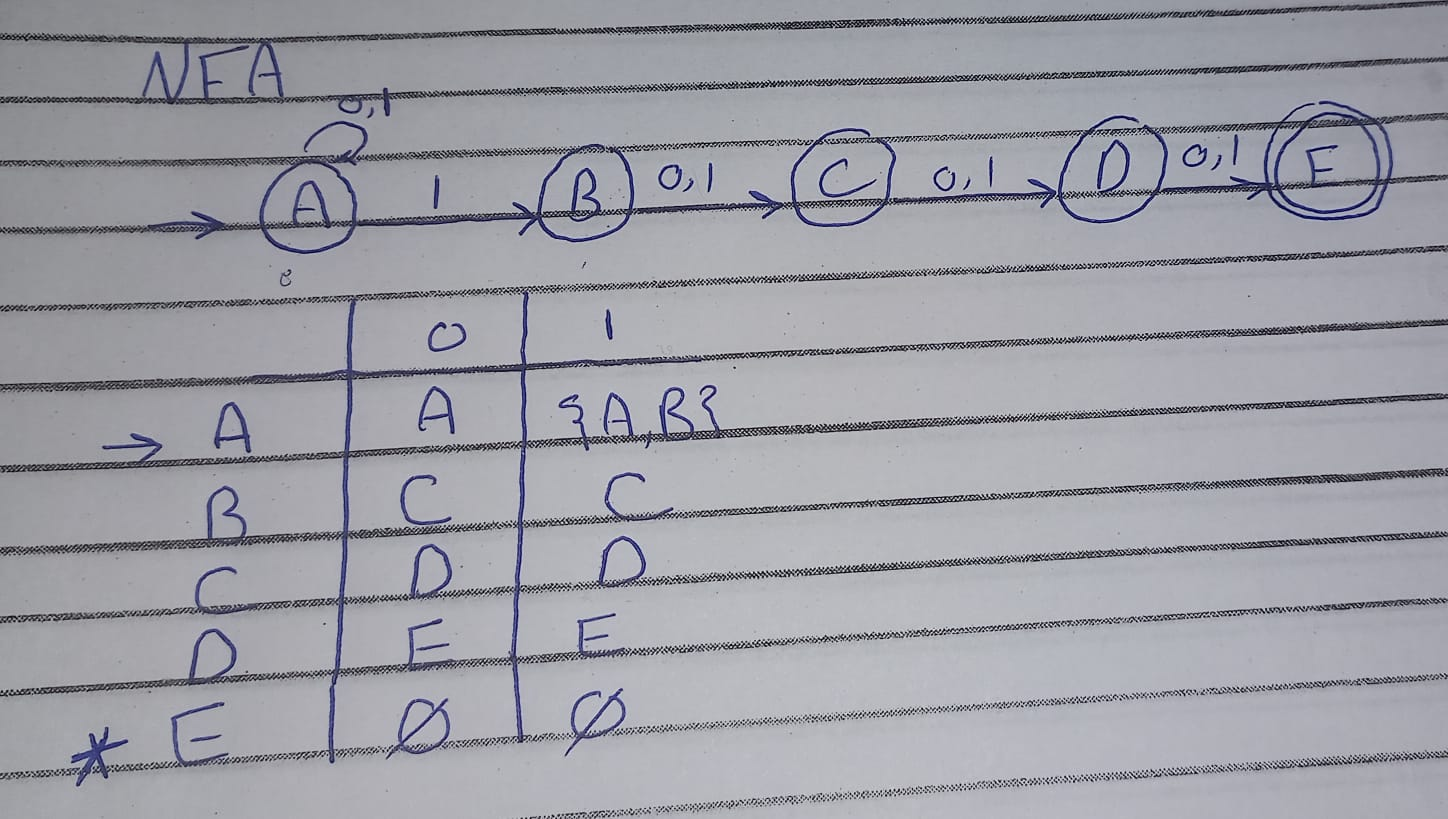

In [3]:
# Define the NFA
NFA = {
    (0, '0'): {0},
    (0, '1'): {0, 1},
    (1, '0'): {2},
    (1, '1'): {2},
    (2, '0'): {3},
    (2, '1'): {3},
    (3, '0'): {4},
    (3, '1'): {4},
    (4, '0'): set(),
    (4, '1'): set(),
    'alphabet': ['0', '1']
}


In [4]:
def EpsilonClosure(NFA, states):
    closure = set(states)
    new_states = set(states)
    
    while new_states:
        current_state = new_states.pop()
        for symbol in NFA.get((current_state, ''), []):
            if symbol not in closure:
                closure.add(symbol)
                new_states.add(symbol)
    
    return closure



In [5]:
def NFA_To_DFA(NFA, start_state, final_states):
    # First, we need to compute the epsilon closure of the start state
    start_closure = EpsilonClosure(NFA, {start_state})

    DFA_states = set()
    DFA_states.add(tuple(sorted(start_closure)))

    #  DFA transitions
    DFA_transitions = {}

    #  keep track of unexplored DFA states
    queue = []
    queue.append(start_closure)

    #  iterate over the unexplored DFA states until the queue is empty
    while queue:
        # We take the next unexplored DFA state from the queue
        current_states = queue.pop(0)

        #  possible input alphabet
        for symbol in ['0','1']:
            # We compute the set of NFA states reachable from the current DFA state with the current input symbol
            reachable = set()
            for state in current_states:
                if (state, symbol) in NFA:
                    reachable.update(NFA[(state, symbol)])

            #  epsilon closure of the reachable NFA states
            reachable_closure = EpsilonClosure(NFA, reachable)

            # We add the reachable closure to the DFA states if it's not already in there
            if tuple(sorted(reachable_closure)) not in DFA_states:
                DFA_states.add(tuple(sorted(reachable_closure)))
                queue.append(reachable_closure)

            # We add a transition from the current DFA state to the reachable closure
            DFA_transitions[(tuple(sorted(current_states)), symbol)] = tuple(sorted(reachable_closure))

    #  DFA states contain at least one final NFA state
    DFA_final_states = set()
    for state in DFA_states:
        for final_state in final_states:
            if final_state in state:
                DFA_final_states.add(state)
                break

    #  convert the DFA states from tuples to sets
    DFA_states = {frozenset(state) for state in DFA_states}

    return DFA_transitions, frozenset(start_closure), DFA_final_states


In [6]:

# Convert the NFA to a DFA
DFA_transitions, start_state, final_states = NFA_To_DFA(NFA, 0, [4])

# Print the DFA transitions, start state, and final states
print('DFA transitions:')
for key, value in DFA_transitions.items():
    print(f'{key}: {value}')
print(f'Start state: {start_state}')
print(f'Final states: {final_states}')


DFA transitions:
((0,), '0'): (0,)
((0,), '1'): (0, 1)
((0, 1), '0'): (0, 2)
((0, 1), '1'): (0, 1, 2)
((0, 2), '0'): (0, 3)
((0, 2), '1'): (0, 1, 3)
((0, 1, 2), '0'): (0, 2, 3)
((0, 1, 2), '1'): (0, 1, 2, 3)
((0, 3), '0'): (0, 4)
((0, 3), '1'): (0, 1, 4)
((0, 1, 3), '0'): (0, 2, 4)
((0, 1, 3), '1'): (0, 1, 2, 4)
((0, 2, 3), '0'): (0, 3, 4)
((0, 2, 3), '1'): (0, 1, 3, 4)
((0, 1, 2, 3), '0'): (0, 2, 3, 4)
((0, 1, 2, 3), '1'): (0, 1, 2, 3, 4)
((0, 4), '0'): (0,)
((0, 4), '1'): (0, 1)
((0, 1, 4), '0'): (0, 2)
((0, 1, 4), '1'): (0, 1, 2)
((0, 2, 4), '0'): (0, 3)
((0, 2, 4), '1'): (0, 1, 3)
((0, 1, 2, 4), '0'): (0, 2, 3)
((0, 1, 2, 4), '1'): (0, 1, 2, 3)
((0, 3, 4), '0'): (0, 4)
((0, 3, 4), '1'): (0, 1, 4)
((0, 1, 3, 4), '0'): (0, 2, 4)
((0, 1, 3, 4), '1'): (0, 1, 2, 4)
((0, 2, 3, 4), '0'): (0, 3, 4)
((0, 2, 3, 4), '1'): (0, 1, 3, 4)
((0, 1, 2, 3, 4), '0'): (0, 2, 3, 4)
((0, 1, 2, 3, 4), '1'): (0, 1, 2, 3, 4)
Start state: frozenset({0})
Final states: {(0, 1, 3, 4), (0, 1, 4), (0, 4), (0, 2, 

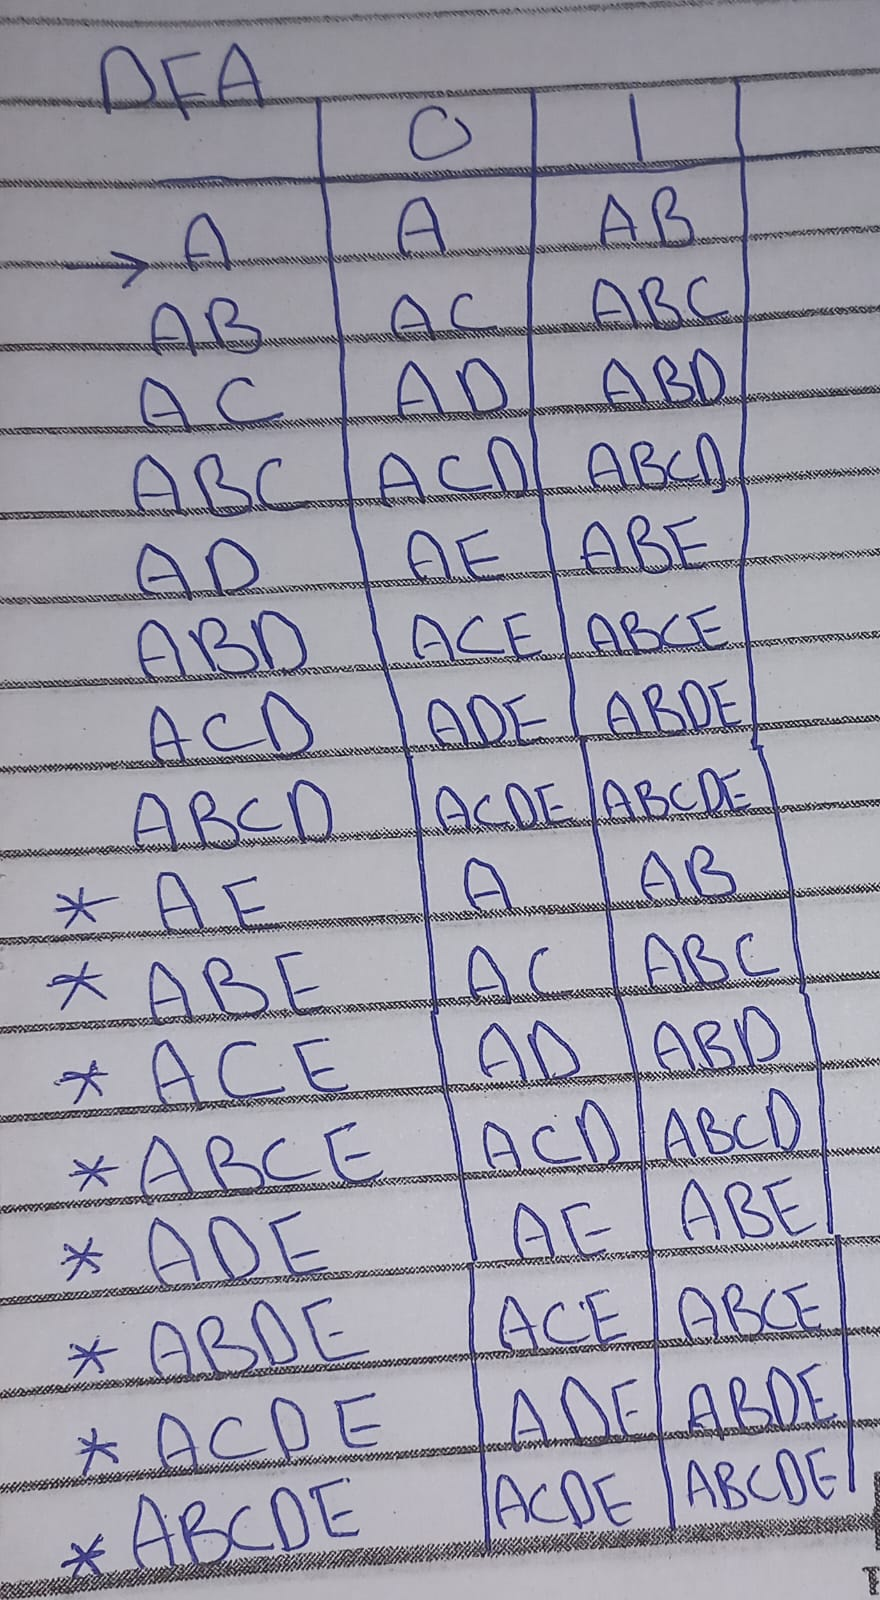

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_dfa(transitions, start_state, final_states):
    G = nx.DiGraph()
    nodes = set()
    edges = {}
    for state, symbol in transitions.keys():
        nodes.add(state)
        nodes.add(transitions[(state, symbol)])
        edges[(state, transitions[(state, symbol)])] = symbol
    for node in nodes:
        if node == start_state:
            G.add_node(node, style='filled', fillcolor='green')
        elif node in final_states:
            G.add_node(node, style='filled', fillcolor='red')
        else:
            G.add_node(node)
    for (src, dst), symbol in edges.items():
        G.add_edge(src, dst, label=symbol)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color=[node.get('fillcolor', 'green') for node in G.nodes.values()])
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(src, dst): symbol for (src, dst), symbol in edges.items()}, font_size=10)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.axis('off')
    plt.show()


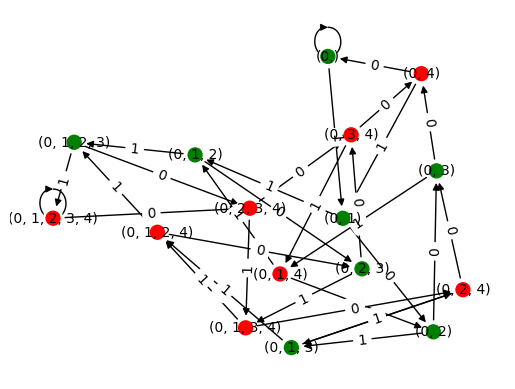

In [29]:
draw_dfa(DFA_transitions, start_state, final_states)


#The string input that passes through all the states of the DFA 


In [9]:
DFA_transitions

{((0,), '0'): (0,),
 ((0,), '1'): (0, 1),
 ((0, 1), '0'): (0, 2),
 ((0, 1), '1'): (0, 1, 2),
 ((0, 2), '0'): (0, 3),
 ((0, 2), '1'): (0, 1, 3),
 ((0, 1, 2), '0'): (0, 2, 3),
 ((0, 1, 2), '1'): (0, 1, 2, 3),
 ((0, 3), '0'): (0, 4),
 ((0, 3), '1'): (0, 1, 4),
 ((0, 1, 3), '0'): (0, 2, 4),
 ((0, 1, 3), '1'): (0, 1, 2, 4),
 ((0, 2, 3), '0'): (0, 3, 4),
 ((0, 2, 3), '1'): (0, 1, 3, 4),
 ((0, 1, 2, 3), '0'): (0, 2, 3, 4),
 ((0, 1, 2, 3), '1'): (0, 1, 2, 3, 4),
 ((0, 4), '0'): (0,),
 ((0, 4), '1'): (0, 1),
 ((0, 1, 4), '0'): (0, 2),
 ((0, 1, 4), '1'): (0, 1, 2),
 ((0, 2, 4), '0'): (0, 3),
 ((0, 2, 4), '1'): (0, 1, 3),
 ((0, 1, 2, 4), '0'): (0, 2, 3),
 ((0, 1, 2, 4), '1'): (0, 1, 2, 3),
 ((0, 3, 4), '0'): (0, 4),
 ((0, 3, 4), '1'): (0, 1, 4),
 ((0, 1, 3, 4), '0'): (0, 2, 4),
 ((0, 1, 3, 4), '1'): (0, 1, 2, 4),
 ((0, 2, 3, 4), '0'): (0, 3, 4),
 ((0, 2, 3, 4), '1'): (0, 1, 3, 4),
 ((0, 1, 2, 3, 4), '0'): (0, 2, 3, 4),
 ((0, 1, 2, 3, 4), '1'): (0, 1, 2, 3, 4)}

1111011000101001

A->AB->ABC->ABCD->ABCDE->ACDE->ABDE->ABCE->ACD->ADE->AE->AB->AC->ABD->ACE->AD->ABE